In \[3\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[9\]:

    # Importing dataset
    df3=pd.read_csv(r'C:\Users\admin\Downloads\prices.csv\prices.csv')

In \[10\]:

    df3

Out\[10\]:

|        | date                | symbol | open       | close      | low        | high       | volume    |
|--------|---------------------|--------|------------|------------|------------|------------|-----------|
| 0      | 2016-01-05 00:00:00 | WLTW   | 123.430000 | 125.839996 | 122.309998 | 126.250000 | 2163600.0 |
| 1      | 2016-01-06 00:00:00 | WLTW   | 125.239998 | 119.980003 | 119.940002 | 125.540001 | 2386400.0 |
| 2      | 2016-01-07 00:00:00 | WLTW   | 116.379997 | 114.949997 | 114.930000 | 119.739998 | 2489500.0 |
| 3      | 2016-01-08 00:00:00 | WLTW   | 115.480003 | 116.620003 | 113.500000 | 117.440002 | 2006300.0 |
| 4      | 2016-01-11 00:00:00 | WLTW   | 117.010002 | 114.970001 | 114.089996 | 117.330002 | 1408600.0 |
| ...    | ...                 | ...    | ...        | ...        | ...        | ...        | ...       |
| 851259 | 2016-12-30          | ZBH    | 103.309998 | 103.199997 | 102.849998 | 103.930000 | 973800.0  |
| 851260 | 2016-12-30          | ZION   | 43.070000  | 43.040001  | 42.689999  | 43.310001  | 1938100.0 |
| 851261 | 2016-12-30          | ZTS    | 53.639999  | 53.529999  | 53.270000  | 53.740002  | 1701200.0 |
| 851262 | 2016-12-30 00:00:00 | AIV    | 44.730000  | 45.450001  | 44.410000  | 45.590000  | 1380900.0 |
| 851263 | 2016-12-30 00:00:00 | FTV    | 54.200001  | 53.630001  | 53.389999  | 54.480000  | 705100.0  |

851264 rows × 7 columns

get the number of rows and columns in data set<a href="#get-the-number-of-rows-and-columns-in-data-set" class="anchor-link">¶</a>
=================================================================================================================================

In \[11\]:

    df3.shape

Out\[11\]:

    (851264, 7)

Data Information

In \[13\]:

    df3.describe()

Out\[13\]:

|       | open          | close         | low           | high          | volume       |
|-------|---------------|---------------|---------------|---------------|--------------|
| count | 851264.000000 | 851264.000000 | 851264.000000 | 851264.000000 | 8.512640e+05 |
| mean  | 70.836986     | 70.857109     | 70.118414     | 71.543476     | 5.415113e+06 |
| std   | 83.695876     | 83.689686     | 82.877294     | 84.465504     | 1.249468e+07 |
| min   | 0.850000      | 0.860000      | 0.830000      | 0.880000      | 0.000000e+00 |
| 25%   | 33.840000     | 33.849998     | 33.480000     | 34.189999     | 1.221500e+06 |
| 50%   | 52.770000     | 52.799999     | 52.230000     | 53.310001     | 2.476250e+06 |
| 75%   | 79.879997     | 79.889999     | 79.110001     | 80.610001     | 5.222500e+06 |
| max   | 1584.439941   | 1578.130005   | 1549.939941   | 1600.930054   | 8.596434e+08 |

In \[20\]:

    # showing column wise %ge of NaN values they contains 

    for i in df3.columns:
      print(i,"\t-\t", df3[i].isna().mean()*100)

    date   -    0.0
    symbol  -    0.0
    open    -    0.0
    close   -    0.0
    low     -    0.0
    high    -    0.0
    volume  -    0.0

In \[21\]:

    cormap = df3.corr()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cormap, annot = True)

Out\[21\]:

    <AxesSubplot:>

![](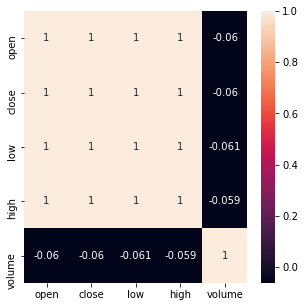%0A)

all columns are higly co-releated except volume

In \[22\]:

    def get_corelated_col(cor_dat, threshold): 
      # Cor_data to be column along which corelation to be measured 
      #Threshold be the value above which of corelation to considered
      feature=[]
      value=[]

      for i ,index in enumerate(cor_dat.index):
        if abs(cor_dat[index]) > threshold:
          feature.append(index)
          value.append(cor_dat[index])

      df3 = pd.DataFrame(data = value, index = feature, columns=['corr value'])
      return df3

In \[23\]:

    top_corelated_values = get_corelated_col(cormap['close'], 0.60)
    top_corelated_values

Out\[23\]:

|       | corr value |
|-------|------------|
| open  | 0.999849   |
| close | 1.000000   |
| low   | 0.999928   |
| high  | 0.999927   |

In \[24\]:

    df3 = df3[top_corelated_values.index]
    df5.head()

Out\[24\]:

|     | open       | close      | low        | high       |
|-----|------------|------------|------------|------------|
| 0   | 123.430000 | 125.839996 | 122.309998 | 126.250000 |
| 1   | 125.239998 | 119.980003 | 119.940002 | 125.540001 |
| 2   | 116.379997 | 114.949997 | 114.930000 | 119.739998 |
| 3   | 115.480003 | 116.620003 | 113.500000 | 117.440002 |
| 4   | 117.010002 | 114.970001 | 114.089996 | 117.330002 |

In \[27\]:

    X = df3.drop(['close'], axis=1)
    y = df3['close']

In \[28\]:

    #feature scaliing
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    X.head()

Out\[28\]:

|     | open     | low      | high     |
|-----|----------|----------|----------|
| 0   | 0.077406 | 0.078419 | 0.078354 |
| 1   | 0.078549 | 0.076889 | 0.077910 |
| 2   | 0.072954 | 0.073655 | 0.074285 |
| 3   | 0.072386 | 0.072732 | 0.072848 |
| 4   | 0.073352 | 0.073113 | 0.072779 |

In \[29\]:

    #now lets split data in test train pairs

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
    Acc = []

linear regression<a href="#linear-regression" class="anchor-link">¶</a>
=======================================================================

In \[30\]:

    from sklearn.linear_model import LinearRegression

    # model training

    model_1 = LinearRegression()
    model_1.fit(X_train, y_train)

Out\[30\]:

    LinearRegression()

In \[31\]:

    # prediction
    y_pred_1 = model_1.predict(X_test)
    pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
    pred_df.head()

Out\[31\]:

|        | Actual    | Predicted |
|--------|-----------|-----------|
| 681011 | 97.750000 | 98.594168 |
| 681012 | 83.040001 | 84.484606 |
| 681013 | 39.750000 | 40.045101 |
| 681014 | 88.680000 | 89.916980 |
| 681015 | 42.630001 | 43.064112 |

In \[32\]:

    # prediction
    y_pred_1 = model_1.predict(X_test)
    pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
    pred_df.head()

Out\[32\]:

|        | Actual    | Predicted |
|--------|-----------|-----------|
| 681011 | 97.750000 | 98.594168 |
| 681012 | 83.040001 | 84.484606 |
| 681013 | 39.750000 | 40.045101 |
| 681014 | 88.680000 | 89.916980 |
| 681015 | 42.630001 | 43.064112 |

In \[33\]:

    # Measure the Accuracy Score

    from sklearn.metrics import r2_score
     
    print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
    Acc.append(r2_score(y_test, y_pred_1))

    Accuracy score of the predictions: 0.9999429298884457

In \[34\]:

    plt.figure(figsize=(8,8))
    plt.ylabel('Close Price', fontsize=16)
    plt.plot(pred_df)
    plt.legend(['Actual Value', 'Predictions'])
    plt.show()

![](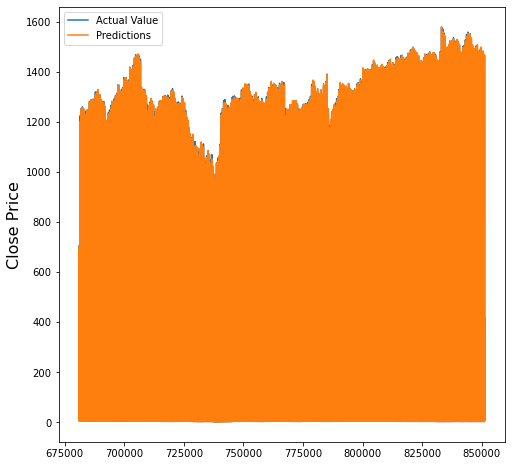%0A)

ANN

In \[35\]:

    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers 


    def regressor(inp_dim):
        
        model = keras.Sequential()
        
        model.add(layers.Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
        model.add(layers.Dense(25, kernel_initializer='normal', activation='relu'))
        model.add(layers.Dense(10, kernel_initializer='normal', activation='relu'))
        model.add(layers.Dense(1, kernel_initializer='normal'))
        
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        return model

In \[36\]:

    # Model Training

    model_2 = regressor(inp_dim=3)
    model_2.fit(X_train, y_train, epochs=30, validation_split=0.2)

    Epoch 1/30
    17026/17026 [==============================] - 47s 3ms/step - loss: 1889.6559 - val_loss: 1.1529
    Epoch 2/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.9375 - val_loss: 1.1971
    Epoch 3/30
    17026/17026 [==============================] - 41s 2ms/step - loss: 0.9390 - val_loss: 1.1736
    Epoch 4/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.8904 - val_loss: 1.7432
    Epoch 5/30
    17026/17026 [==============================] - 41s 2ms/step - loss: 0.8914 - val_loss: 1.1333
    Epoch 6/30
    17026/17026 [==============================] - 41s 2ms/step - loss: 0.8553 - val_loss: 1.1625
    Epoch 7/30
    17026/17026 [==============================] - 41s 2ms/step - loss: 0.8750 - val_loss: 1.5026
    Epoch 8/30
    17026/17026 [==============================] - 41s 2ms/step - loss: 0.8616 - val_loss: 1.0384
    Epoch 9/30
    17026/17026 [==============================] - 45s 3ms/step - loss: 0.8244 - val_loss: 1.0168
    Epoch 10/30
    17026/17026 [==============================] - 45s 3ms/step - loss: 0.8165 - val_loss: 1.0779
    Epoch 11/30
    17026/17026 [==============================] - 43s 3ms/step - loss: 0.8085 - val_loss: 1.4381
    Epoch 12/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.8397 - val_loss: 1.1188
    Epoch 13/30
    17026/17026 [==============================] - 43s 3ms/step - loss: 0.8143 - val_loss: 0.9597
    Epoch 14/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.7790 - val_loss: 1.0277
    Epoch 15/30
    17026/17026 [==============================] - 38s 2ms/step - loss: 0.7834 - val_loss: 1.3176
    Epoch 16/30
    17026/17026 [==============================] - 32s 2ms/step - loss: 0.7943 - val_loss: 1.1057
    Epoch 17/30
    17026/17026 [==============================] - 3494s 205ms/step - loss: 0.7517 - val_loss: 1.0548
    Epoch 18/30
    17026/17026 [==============================] - 37s 2ms/step - loss: 0.7656 - val_loss: 0.9016
    Epoch 19/30
    17026/17026 [==============================] - 35s 2ms/step - loss: 0.7691 - val_loss: 0.9457
    Epoch 20/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.7151 - val_loss: 1.1185
    Epoch 21/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.7478 - val_loss: 0.9727
    Epoch 22/30
    17026/17026 [==============================] - 39s 2ms/step - loss: 0.7250 - val_loss: 1.8894
    Epoch 23/30
    17026/17026 [==============================] - 42s 2ms/step - loss: 0.6964 - val_loss: 0.9225
    Epoch 24/30
    17026/17026 [==============================] - 38s 2ms/step - loss: 0.6776 - val_loss: 1.1178
    Epoch 25/30
    17026/17026 [==============================] - 47s 3ms/step - loss: 0.6857 - val_loss: 0.8350
    Epoch 26/30
    17026/17026 [==============================] - 43s 3ms/step - loss: 0.7098 - val_loss: 0.8335
    Epoch 27/30
    17026/17026 [==============================] - 43s 3ms/step - loss: 0.6958 - val_loss: 0.9643
    Epoch 28/30
    17026/17026 [==============================] - 40s 2ms/step - loss: 0.6502 - val_loss: 0.7951
    Epoch 29/30
    17026/17026 [==============================] - 39s 2ms/step - loss: 0.6411 - val_loss: 0.7735
    Epoch 30/30
    17026/17026 [==============================] - 35s 2ms/step - loss: 0.6330 - val_loss: 0.7840

Out\[36\]:

    <tensorflow.python.keras.callbacks.History at 0x262ee73d3d0>

In \[38\]:

    # Prediction

    y_pred_2 = model_2.predict(X_test)

In \[39\]:

    pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
    pred_df.head()

Out\[39\]:

|        | Actual    | Predicted |
|--------|-----------|-----------|
| 681011 | 97.750000 | 99.220238 |
| 681012 | 83.040001 | 84.668037 |
| 681013 | 39.750000 | 40.244099 |
| 681014 | 88.680000 | 90.703629 |
| 681015 | 42.630001 | 43.475227 |

In \[40\]:

    # Measure the Accuracy Score

    from sklearn.metrics import r2_score
     
    print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
    Acc.append(r2_score(y_test, y_pred_2))

    Accuracy score of the predictions: 0.9999108006275247

In \[43\]:

    plt.figure(figsize=(4,4))
    plt.ylabel('Close Price', fontsize=10)
    plt.plot(pred_df)
    plt.legend(['Actual Value', 'Predictions'])
    plt.show()

![](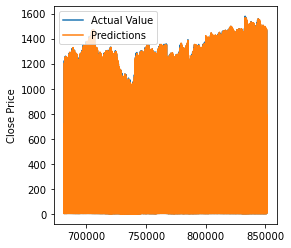%0A)

In \[45\]:

    X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In \[46\]:

    from tensorflow.keras import Sequential,utils
    from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In \[47\]:

    def reg():
        
        model = Sequential()
        
        model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
        model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
        model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
        
        model.add(Flatten())
        
        model.add(Dense(50, activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(units = 1))
        
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        return model

In \[48\]:

    # Model Training

    model_3 = reg()
    model_3.fit(X_train, y_train, epochs=10, validation_split=0.2)

    Epoch 1/10
    17026/17026 [==============================] - 114s 6ms/step - loss: 238.9390 - val_loss: 3.8534
    Epoch 2/10
    17026/17026 [==============================] - 87s 5ms/step - loss: 4.1546 - val_loss: 5.8295
    Epoch 3/10
    17026/17026 [==============================] - 90s 5ms/step - loss: 3.5665 - val_loss: 1.1994
    Epoch 4/10
    17026/17026 [==============================] - 95s 6ms/step - loss: 2.9705 - val_loss: 94.0588
    Epoch 5/10
    17026/17026 [==============================] - 98s 6ms/step - loss: 2.8596 - val_loss: 5.6166
    Epoch 6/10
    17026/17026 [==============================] - 96s 6ms/step - loss: 2.3561 - val_loss: 1.8181
    Epoch 7/10
    17026/17026 [==============================] - 94s 5ms/step - loss: 2.1575 - val_loss: 24.5517
    Epoch 8/10
    17026/17026 [==============================] - 103s 6ms/step - loss: 2.3530 - val_loss: 1.9361
    Epoch 9/10
    17026/17026 [==============================] - 98s 6ms/step - loss: 1.9754 - val_loss: 1.1576
    Epoch 10/10
    17026/17026 [==============================] - 96s 6ms/step - loss: 2.0413 - val_loss: 1.3990

Out\[48\]:

    <tensorflow.python.keras.callbacks.History at 0x262dadcb130>

In \[52\]:

    # Prediction

    y_pred_3 = model_3.predict(X_test)

In \[53\]:

    pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
    pred_df.head()

Out\[53\]:

|        | Actual    | Predicted |
|--------|-----------|-----------|
| 681011 | 97.750000 | 99.943100 |
| 681012 | 83.040001 | 85.185036 |
| 681013 | 39.750000 | 40.804558 |
| 681014 | 88.680000 | 91.504021 |
| 681015 | 42.630001 | 44.098869 |

In \[54\]:

    # Measure the Accuracy Score

    from sklearn.metrics import r2_score
     
    print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
    Acc.append(r2_score(y_test, y_pred_3))

    Accuracy score of the predictions: 0.9998512816464602

In \[55\]:

    plt.figure(figsize=(8,8))
    plt.ylabel('Close Price', fontsize=16)
    plt.plot(pred_df)
    plt.legend(['Actual Value', 'Predictions'])
    plt.show()

![](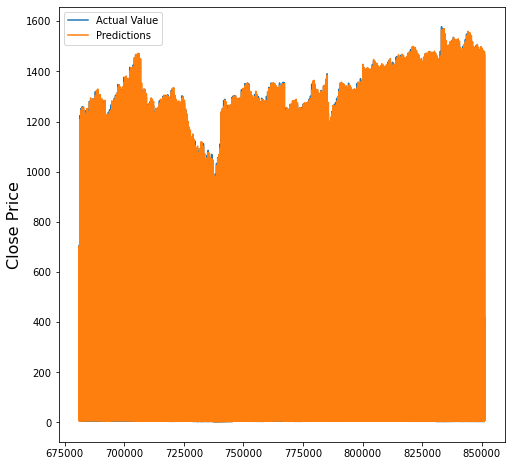%0A)

Comparision of Accuracies of different models

In \[56\]:

    plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
             marker='o', markerfacecolor='blue', markersize=12) 
    plt.ylabel('Acc')
    plt.xlabel('Models')
    plt.title("Accuracies")
    plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
    plt.show()

![](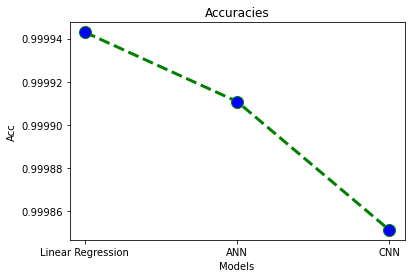%0A)

Now converting data in a time series data and applying some more models

In \[58\]:

    close = df3.reset_index()['close']
    close.head()

Out\[58\]:

    0    125.839996
    1    119.980003
    2    114.949997
    3    116.620003
    4    114.970001
    Name: close, dtype: float64

In \[59\]:

    plt.plot(close)
    plt.show()

![](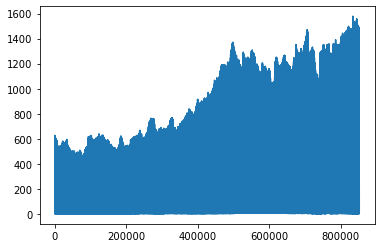%0A)

In \[60\]:

    time_step = 30
    X, y = [], []

    for i in range(len(close)-time_step-1):
        X.append(close[i:(i+time_step)])
        y.append(close[(i+time_step)])

    X = np.array(X)
    y = np.array(y)

In \[61\]:

    X[:5]

Out\[61\]:

    array([[125.839996, 119.980003, 114.949997, 116.620003, 114.970001,
            115.550003, 112.849998, 114.379997, 112.529999, 110.379997,
            109.300003, 110.      , 111.949997, 110.120003, 111.      ,
            110.709999, 112.580002, 114.470001, 114.5     , 110.559998,
            114.050003, 115.709999, 114.019997, 111.160004, 110.650002,
            107.519997, 107.129997, 107.839996, 110.769997, 111.239998],
           [119.980003, 114.949997, 116.620003, 114.970001, 115.550003,
            112.849998, 114.379997, 112.529999, 110.379997, 109.300003,
            110.      , 111.949997, 110.120003, 111.      , 110.709999,
            112.580002, 114.470001, 114.5     , 110.559998, 114.050003,
            115.709999, 114.019997, 111.160004, 110.650002, 107.519997,
            107.129997, 107.839996, 110.769997, 111.239998, 111.599998],
           [114.949997, 116.620003, 114.970001, 115.550003, 112.849998,
            114.379997, 112.529999, 110.379997, 109.300003, 110.      ,
            111.949997, 110.120003, 111.      , 110.709999, 112.580002,
            114.470001, 114.5     , 110.559998, 114.050003, 115.709999,
            114.019997, 111.160004, 110.650002, 107.519997, 107.129997,
            107.839996, 110.769997, 111.239998, 111.599998, 110.330002],
           [116.620003, 114.970001, 115.550003, 112.849998, 114.379997,
            112.529999, 110.379997, 109.300003, 110.      , 111.949997,
            110.120003, 111.      , 110.709999, 112.580002, 114.470001,
            114.5     , 110.559998, 114.050003, 115.709999, 114.019997,
            111.160004, 110.650002, 107.519997, 107.129997, 107.839996,
            110.769997, 111.239998, 111.599998, 110.330002, 113.040001],
           [114.970001, 115.550003, 112.849998, 114.379997, 112.529999,
            110.379997, 109.300003, 110.      , 111.949997, 110.120003,
            111.      , 110.709999, 112.580002, 114.470001, 114.5     ,
            110.559998, 114.050003, 115.709999, 114.019997, 111.160004,
            110.650002, 107.519997, 107.129997, 107.839996, 110.769997,
            111.239998, 111.599998, 110.330002, 113.040001, 111.889999]])

In \[62\]:

    y[:5]

Out\[62\]:

    array([111.599998, 110.330002, 113.040001, 111.889999, 111.559998])

In \[63\]:

    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    pd.DataFrame(X).head()

Out\[63\]:

|     | 0        | 1        | 2        | 3        | 4        | 5        | 6        | 7        | 8        | 9        | ... | 20       | 21       | 22       | 23       | 24       | 25       | 26       | 27       | 28       | 29       |
|-----|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|-----|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| 0   | 0.079238 | 0.075523 | 0.072334 | 0.073393 | 0.072347 | 0.072714 | 0.071002 | 0.071972 | 0.070800 | 0.069436 | ... | 0.071763 | 0.072816 | 0.071744 | 0.069931 | 0.069608 | 0.067623 | 0.067376 | 0.067826 | 0.069684 | 0.069982 |
| 1   | 0.075523 | 0.072334 | 0.073393 | 0.072347 | 0.072714 | 0.071002 | 0.071972 | 0.070800 | 0.069436 | 0.068752 | ... | 0.072816 | 0.071744 | 0.069931 | 0.069608 | 0.067623 | 0.067376 | 0.067826 | 0.069684 | 0.069982 | 0.070210 |
| 2   | 0.072334 | 0.073393 | 0.072347 | 0.072714 | 0.071002 | 0.071972 | 0.070800 | 0.069436 | 0.068752 | 0.069196 | ... | 0.071744 | 0.069931 | 0.069608 | 0.067623 | 0.067376 | 0.067826 | 0.069684 | 0.069982 | 0.070210 | 0.069405 |
| 3   | 0.073393 | 0.072347 | 0.072714 | 0.071002 | 0.071972 | 0.070800 | 0.069436 | 0.068752 | 0.069196 | 0.070432 | ... | 0.069931 | 0.069608 | 0.067623 | 0.067376 | 0.067826 | 0.069684 | 0.069982 | 0.070210 | 0.069405 | 0.071123 |
| 4   | 0.072347 | 0.072714 | 0.071002 | 0.071972 | 0.070800 | 0.069436 | 0.068752 | 0.069196 | 0.070432 | 0.069272 | ... | 0.069608 | 0.067623 | 0.067376 | 0.067826 | 0.069684 | 0.069982 | 0.070210 | 0.069405 | 0.071123 | 0.070394 |

5 rows × 30 columns

In \[64\]:

    #now lets split data in test train pairs

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

    Acc = []

LSTM

In \[65\]:

    X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
    X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In \[66\]:

    from tensorflow.keras.layers import LSTM

    def Reg():
        model = Sequential()
        
        model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
        model.add(LSTM(70, return_sequences=True))
        model.add(LSTM(70))
        model.add(Dense(1))
        
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        return model

In \[67\]:

    # Model Training

    model_1 = reg()
    model_1.fit(X_train_, y_train, epochs=2, validation_split=0.2)

    Epoch 1/2
    17025/17025 [==============================] - 274s 15ms/step - loss: 3394.8011 - val_loss: 3218.8293
    Epoch 2/2
    17025/17025 [==============================] - 243s 14ms/step - loss: 341.9110 - val_loss: 2757.4771

Out\[67\]:

    <tensorflow.python.keras.callbacks.History at 0x262efbf4550>

In \[68\]:

    # Prediction

    y_pred_1 = model_1.predict(X_test_)

In \[69\]:

    pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
    pred_df.head()

Out\[69\]:

|     | Actual    | Predicted  |
|-----|-----------|------------|
| 0   | 69.690002 | 59.523777  |
| 1   | 43.520000 | 109.025085 |
| 2   | 37.000000 | 48.110275  |
| 3   | 87.019997 | 58.674450  |
| 4   | 52.099998 | 34.341480  |

In \[70\]:

    # Measure the Accuracy Score

    from sklearn.metrics import r2_score
     
    print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
    Acc.append(r2_score(y_test, y_pred_1))

    Accuracy score of the predictions: 0.3931069910529168

In \[71\]:

    plt.figure(figsize=(8,8))
    plt.ylabel('Close Price', fontsize=16)
    plt.plot(pred_df)
    plt.legend(['Actual Value', 'Predictions'])
    plt.show()

![](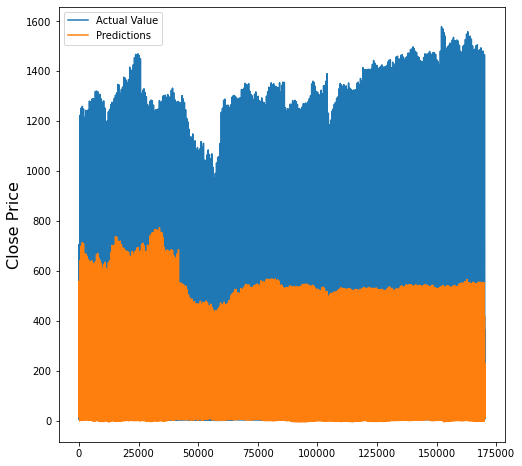%0A)

In \[ \]:

     

In \[ \]: